### Logistic Regression
- mainly used to two class classification (only 2 choice of answer)
- it is a linear model

<img src='images/logreg.png'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Github\Datasets\Bank_churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.duplicated().sum()

0

In [9]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### Feature Engineering
#### Feature selection using data visualization

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
num = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
cat = ['Geography', 'Gender','HasCrCard', 'IsActiveMember']

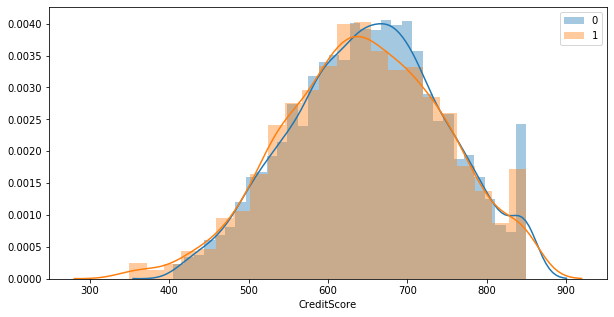

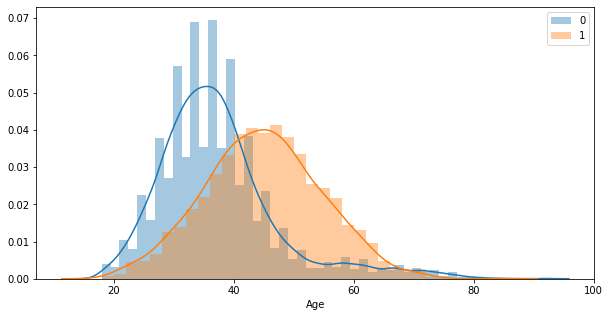

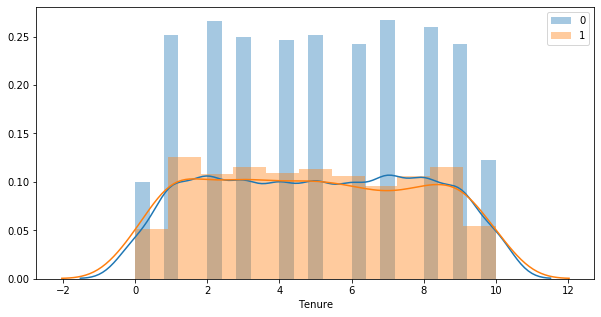

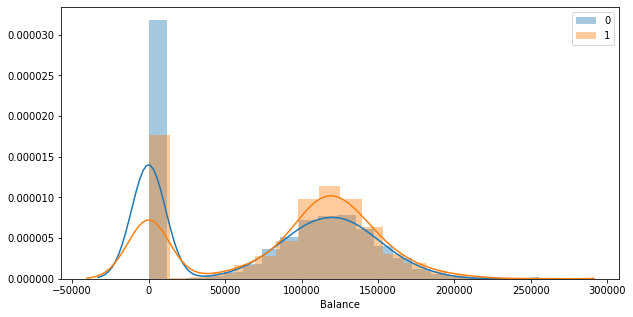

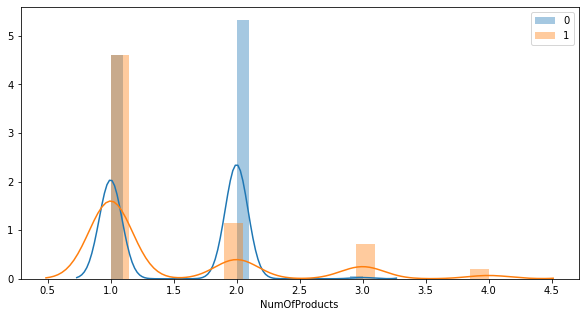

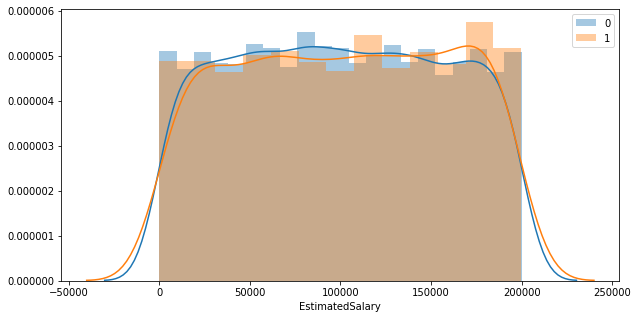

In [12]:
for col in num:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col][df['Exited']==0])
    sns.distplot(df[col][df['Exited']==1])
    plt.legend(['0','1'])
    plt.show()

- CreditScore, Tenure, and EstimatedSalary do not impact the Exited behavior
- Age (20-40) have higher probability customer didn't leave the bank, over 40 customers tend to leave bank (linear impact)
- 0 balance customers was staying, higher balance customers tend to leave the bank (non-linear impact)
- Customers with 2 number of products stay. 1 product has similar probability of leaving or not leaving (non-linear impact)

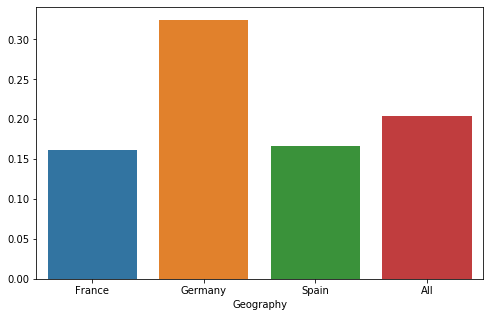

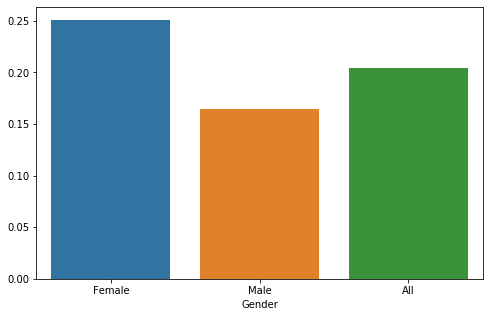

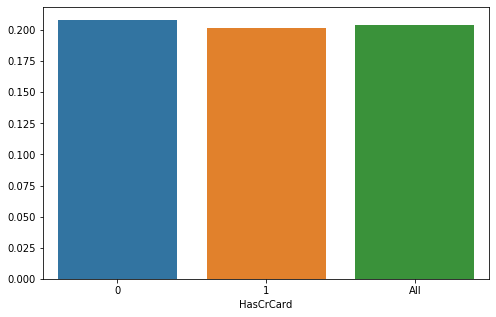

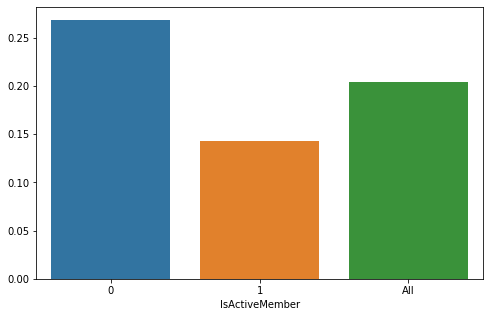

In [13]:
for col in cat:
    table = pd.crosstab(df[col],df.Exited,margins=True)
    dropout_rate = table[1]/table['All']
#table[1] means df.Exited == 1
    plt.figure(figsize=(8,5))
    sns.barplot(dropout_rate.index,dropout_rate.values)
    plt.show()

Features that are not important: HasCrCard, CreditScore, Tenure, and EstimatedSalary

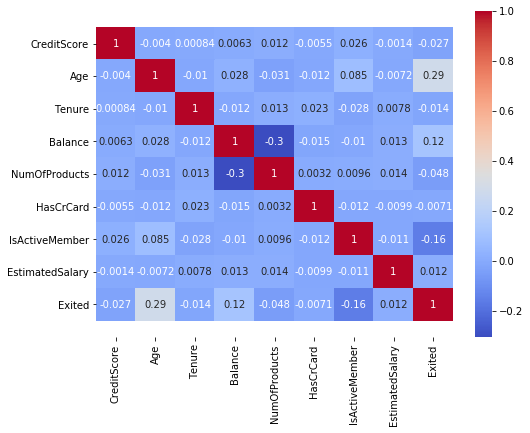

In [14]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5, top-0.5)
plt.show()

low-linear correlation

### ANOVA

ANOVA = Analysis of variance – compare means / variation in two or more samples 

Sample1 – an array having data of age of customers who left the bank 

Sample2 – an array having data of age of customers who didn't leave the bank 

For ANOVA -  

Null Hypothesis – H0 = means of two samples are similar to each other 

Alternate Hypothesis – Ha = means of two samples are different each other 


If the business confidence is = 95% = 0.95 

Significance level = 5% = 0.05 


If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = means of features are similar to each other = feature is not important

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = means of features are different to each other = feature is important


In [15]:
xnum = df[num]
y = df.Exited

from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(xnum,y)

for i in range(len(xnum.columns)):
    print('pvalue of',xnum.columns[i],'=',pval[i])

pvalue of CreditScore = 0.006738213892205324
pvalue of Age = 1.2399313093459443e-186
pvalue of Tenure = 0.1615268494946745
pvalue of Balance = 1.2755633191546494e-32
pvalue of NumOfProducts = 1.717333004806199e-06
pvalue of EstimatedSalary = 0.22644042802263928


Unimportant features: Tenure, EstimatedSalary

#### Chi Square Test 
Chi Square Test - comparison of distribution of categories among multiple groups

It is widely used in categorical data

Sample1 – distribution of geography for customers who left

Sample2 – distrbution of geography for customers who didn't leave
*************************************************************
 

 

**For Chi Square -**  

Null Hypothesis – H0 = two groups have similar distribution 

Alternate Hypothesis – Ha = two groups have different distribution.
 

 

- If the business confidence is = 95% = 0.95 

- Significance level = 5% = 0.05 

 ******************************

 

If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = feature is not important  

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = feature is important 

In [16]:
xcat = df[cat]
from sklearn.preprocessing import LabelEncoder
xcat.Geography = LabelEncoder().fit_transform(xcat.Geography)
xcat.Gender = LabelEncoder().fit_transform(xcat.Gender)

from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)
for i in range(len(cat)):
    print('pvalue of',cat[i],'=',pval[i])

pvalue of Geography = 0.0005756078382573235
pvalue of Gender = 7.015574513879596e-13
pvalue of HasCrCard = 0.6984962089530451
pvalue of IsActiveMember = 1.568036240543455e-27


C:\Users\Juanda\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


HasCrCard is unimportant feature

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
x = df.drop(['Exited','EstimatedSalary','HasCrCard','Tenure'],axis=1)
y = df.Exited

### Label Encoding

In [26]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1


In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
#encoding Gender
le = LabelEncoder()
x.Gender = le.fit_transform(x.Gender)
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1
5,645,Spain,1,44,113755.78,2,0
6,822,France,1,50,0.00,2,1


In [31]:
#encoding Geography
from sklearn.preprocessing import StandardScaler
encoder = ColumnTransformer([('ohe',OneHotEncoder(),[1])],remainder='passthrough')
#encoder.fit(x)
x2 = encoder.fit_transform(x)
x2 = pd.DataFrame(x2)
x2.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,502.0,0.0,42.0,159660.80,3.0,0.0
1,1.0,0.0,0.0,699.0,0.0,39.0,0.00,2.0,0.0
2,0.0,0.0,1.0,850.0,0.0,43.0,125510.82,1.0,1.0
3,0.0,0.0,1.0,645.0,1.0,44.0,113755.78,2.0,0.0
4,1.0,0.0,0.0,822.0,1.0,50.0,0.00,2.0,1.0


In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=5)

## Apply Machine Learning

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
new_customer = [[650,'Germany',1,51,456125,3,1]]
new_customer = encoder.transform(new_customer)
model.predict(new_customer)

array([0], dtype=int64)

## Performance Analysis

In [35]:
ypred = model.predict(xtest)
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.8125